# Домашнее задание (30 баллов)

## 1. Теория (6 баллов)

 Сеть $G(t)$ образуется присоединением к центральному узлу $t$ треугольников - см. рисунок. ![picture](https://drive.google.com/uc?export=view&id=10oUgXsay2rBYHGIbKoHJVvj95Rl632qz)
 
 Пусть всего в сети $n$ вершин, $n=2t+1$. 

*  (2 балла) Определите средний коэффициент кластеризации вершин в сети $\overline{C}$  как функцию $n$. Чему равен предел при $n \to \infty$?
> Ответ : \
> $C=\frac{2N_t(i)}{k_i(k_i-1)}$ , \
> где $N_t$ -число треугольников с вершиной $i$. \
> Коэффициент кластеризации центральной вершины : $C_c=\frac{2t}{2t(2t-1)}=\frac{1}{2t-1}$ \
> Коэффициенты кластеризации остальных вершин : $C_t=\frac{2}{2(2-1)}=1$ \
> $\overline{C}=\frac{C_c + \sum_{i=1}^{2t} C_{ti}}{n}=\frac{\frac{1}{n-2} + 2t}{n} = \frac{{n^2-3n+3}}{n(n-2)}$ \
> $ \begin{align} \lim_{n\to\infty} \overline{C} = \lim_{n\to\infty} \frac{1-\frac{3}{n}+\frac{3}{n^2}}{1-\frac{2}{n}} = 1 \end{align}$
---
* (2 балла) Определите транзитивность  $T$ в зависимости от числа вершин $n$. Чему равен предел при $n \to \infty$? 
> Ответ : \
> $T=\frac{6N_t}{\sum_i k_i(k_i-1)}$ , \
> где $N_t$ -число треугольников, $k_i$ - степень вершин. \
> $T=\frac{6t}{2t(2t-1)+4t}=\frac{6}{2(2t-1)+4}=\frac{3}{n}$ \
>  $ \begin{align} \lim_{n\to\infty} T = \lim_{n\to\infty} \frac{3}{n} = 0 \end{align}$
---
* (2 балла) Определите коэффициент ассортативности  $r$ в зависимости от числа вершин $n$. Чему равен предел при $n \to \infty$? 
> Ответ : \
> $E = 3t$ \
> Пусть $l$ - массив степеней "левых" вершин ребра: $[2t, 2, 2, 2t, 2, 2 ...]$, \
> $p$ - массив степеней "правых" вершин ребра: $[2, 2, 2t, 2, 2, 2t...]$, \
> $l_{0} = l+p, \overline{l_{0}}=2\cdot\frac{2}{3}+2t\cdot\frac{1}{3}$ , \
> $p_{0} = p+l, \overline{p_{0}}=2\cdot\frac{2}{3}+2t\cdot\frac{1}{3}$ , \
> тогда $\overline{l_{0}p_{0}} = 4\cdot\frac{1}{3}+4t\cdot\frac{2}{3}$ , \
> $\sigma_{l_{0}}= \sqrt{\frac{2}{3}(2-\frac{4}{3}-\frac{2t}{3})^2+\frac{1}{3}(2t-\frac{4}{3}-\frac{2t}{3})^2},  \sigma_{p_{0}}=\sigma_{l_{0}}$ \
> $r = \frac{\overline{l_{0}p_{0}} - \overline{l_{0}}\overline{p_{0}}}{\sigma_{l_{0}}\sigma_{p_{0}}}=\frac{\overline{l_{0}p_{0}} - \overline{l_{0}}\overline{p_{0}}}{\sigma_{l_{0}}^2}=\frac{-\frac{4t^2}{9}+\frac{8t}{9}-\frac{4}{9}}{\frac{8t^2}{9}-\frac{16t}{9}+\frac{8}{9}}=-\frac{1}{2}$\
> $ \begin{align} \lim_{n\to\infty} r = -\frac{1}{2}\end{align}$

## 2. Анализ данных (24 балла)
Выберите данные [здесь](https://networkrepository.com/networks.php) или [здесь](https://snap.stanford.edu/data/). 
Выведите число вершин, число ребер и плотность сети. 




In [ ]:
!pip install powerlaw

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx 
import seaborn as sns
import powerlaw
import matplotlib.cm as cm
from tqdm.notebook import tqdm
import pandas as pd

In [ ]:
!gdown --id 1VjbjpGsSxSQjjZTlsLR9ahyxR4I9uzx0

Downloading...
From: https://drive.google.com/uc?id=1VjbjpGsSxSQjjZTlsLR9ahyxR4I9uzx0
To: /content/CA-GrQc.txt
100% 352k/352k [00:00<00:00, 49.9MB/s]


In [ ]:
G=nx.read_edgelist('CA-GrQc.txt')

In [ ]:
print('Nodes:',G.number_of_nodes())
print('Edges:',G.number_of_edges())
print('Density:',nx.density(G))

Nodes: 5242
Edges: 14496
Density: 0.001055278280507905


### Основные структурные свойства, устойчивость сети ( 7 баллов) 

*  (2 балла)  Постройте распределение коэффициента кластеризации, какие значения он преимущественно принимает? Сколько вершин имеют нулевую кластеризацию, сколько единичную?

In [ ]:
coefs = nx.clustering(G) # словарь вершина:коэффициент

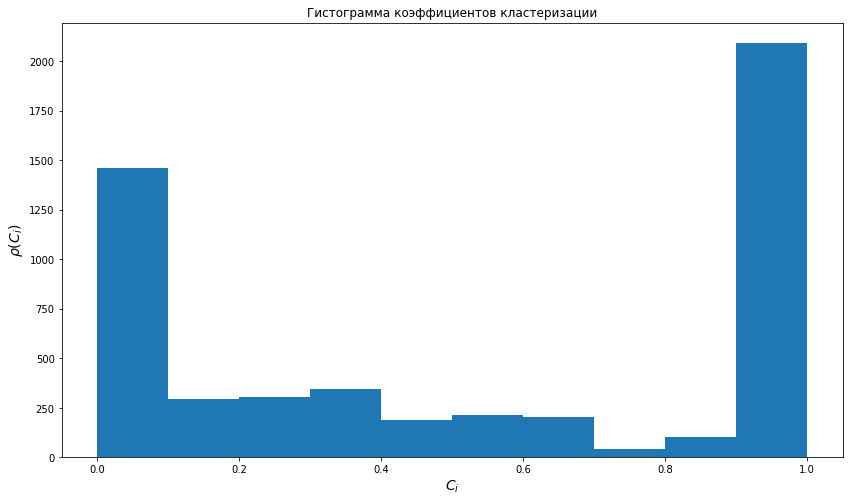

In [ ]:
plt.figure(figsize=(14, 8))
n, b, p = plt.hist(coefs.values())
plt.xlabel('$C_{i}$', fontsize=14)
plt.title('Гистограмма коэффициентов кластеризации')
plt.ylabel(r'$\rho(C_{i})$', fontsize=14);

In [ ]:
print(f'Количество вершин с нулевой кластеризацией : {int(n[0])}')

Количество вершин с нулевой кластеризацией : 1460


In [ ]:
print(f'Количество вершин с единичной кластеризацией : {int(n[-1])}')

Количество вершин с единичной кластеризацией : 2090


In [ ]:
print(f'Доля вершин с нулевой кластеризацией : {n[0]/G.number_of_nodes():.2f}')
print(f'Доля вершин с единичной кластеризацией : {n[-1]/G.number_of_nodes():.2f}')

Доля вершин с нулевой кластеризацией : 0.28
Доля вершин с единичной кластеризацией : 0.40


*68% вершин имеют нулевую или единичную кластеризацию.*

*  (1 балл) Вычислите коэффициент корреляции Пирсона степени и коэффициента кластеризации вершин;


In [ ]:
degrees=[d for n, d in G.degree()]

In [ ]:
print(f'Коэффициент корреляции Пирсона (степень вершины и коэффициент кластеризации вершины) : {np.corrcoef(np.array(list(coefs.values())), np.array(degrees))[0, 1]:.3f}')

Коэффициент корреляции Пирсона (степень вершины и коэффициент кластеризации вершины) : 0.092


*  (2 балла) Определите число компонет связности и постройте распределение размера компонент связности (удалите из массива максимальную компоненту для наглядности;


In [ ]:
lens = [len(i) for i in nx.connected_components(G)]
print(f'Число компонент связности : {len(lens)}')

Число компонент связности : 355


In [ ]:
lens.remove(max(lens)) # удаление максимальной компоненты

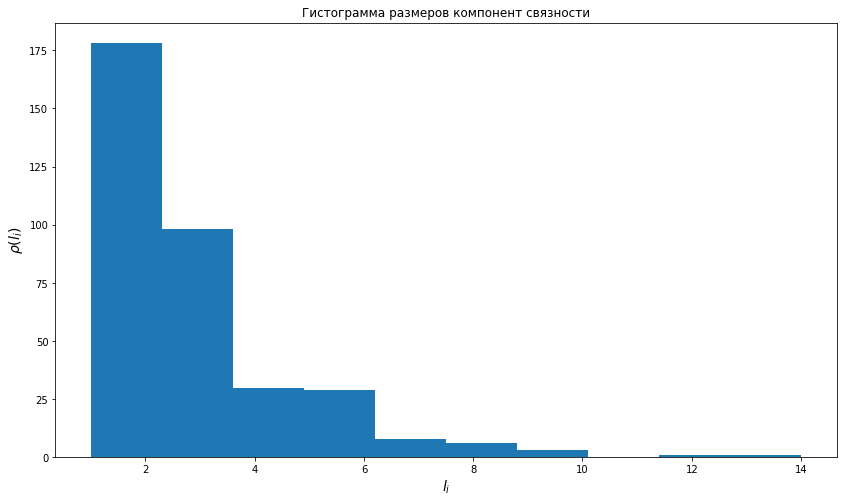

In [ ]:
plt.figure(figsize=(14, 8))
n, b, p = plt.hist(lens)
plt.xlabel('$l_{i}$', fontsize=14)
plt.title('Гистограмма размеров компонент связности')
plt.ylabel(r'$\rho(l_{i})$', fontsize=14);

* (2 балла) Исследуйте локальную эффективность максимальной компоненты на устойчивость.

In [ ]:
LCG_nodes=max(nx.connected_components(G), key=len) # максимальная компонента
LCG=G.subgraph(LCG_nodes) # создаем подграф на списке вершин максимальной компоненты

In [ ]:
%%time
epsilon=0.05 # доля удаляемых ребер за один шаг
n=int(epsilon*LCG.number_of_edges()) 
H=LCG.copy()
tr=[]
tr.append(nx.local_efficiency(H))
for i in range(10):
  edges_removed=[list(H.edges)[k] for k in np.random.choice(H.number_of_edges(),n, replace=False)]
  H.remove_edges_from(edges_removed)
  tr.append(nx.local_efficiency(H))

CPU times: user 1min 44s, sys: 267 ms, total: 1min 44s
Wall time: 1min 44s


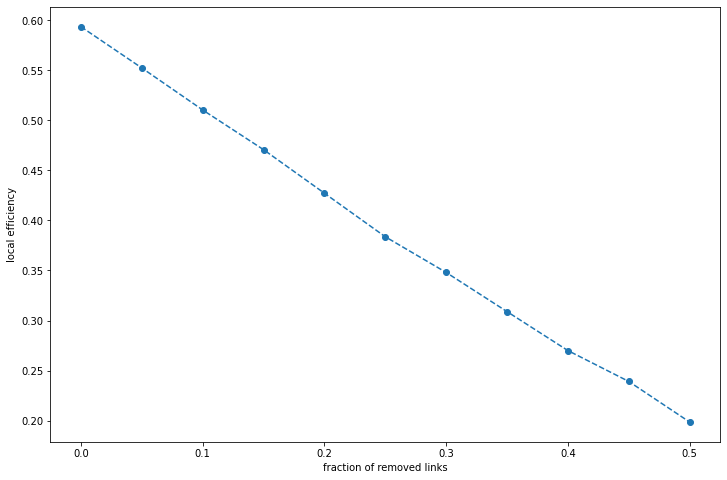

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(np.linspace(0,10*epsilon,11),tr,'o--')
plt.xlabel('fraction of removed links')
plt.ylabel('local efficiency');


### Распределение степеней и корреляция ( 9 баллов)

*  (3 балла) Для выбранной сети постройте распределение степеней, определите, подчиняется ли распределение степенному закону, оцените параметры распределения.


In [ ]:
h,x=np.histogram(degrees,bins=60,density=True) 

x_=(x[:-1]+x[1:])/2 # координаты середины столбиков

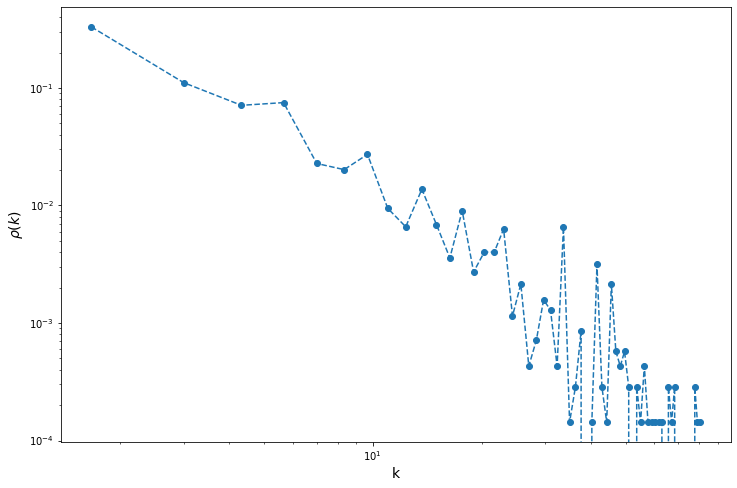

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(x_,h,'o--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k', fontsize=14)
plt.ylabel(r'$\rho(k)$', fontsize=14);

Calculating best minimal value for power law fit


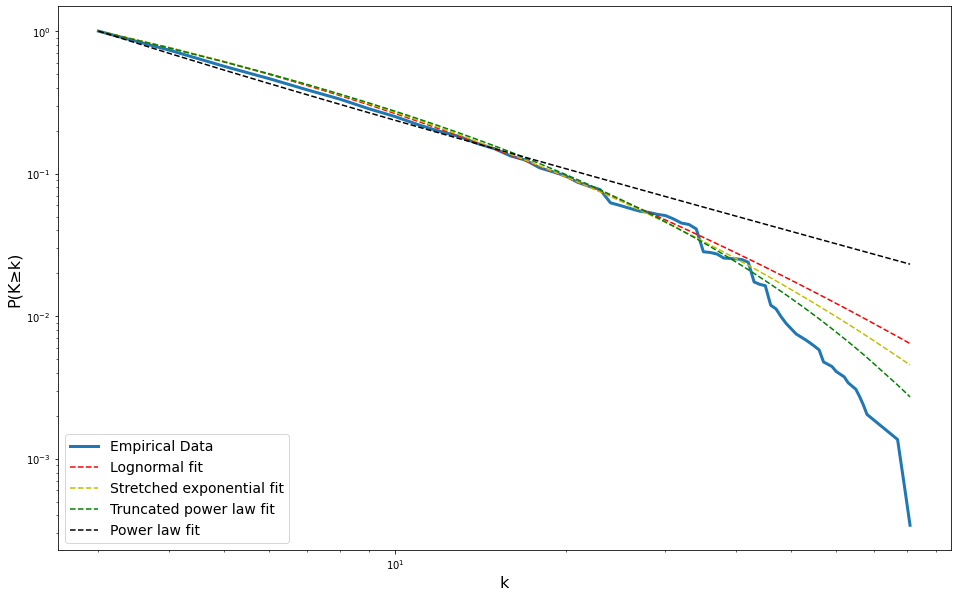

In [ ]:
fig, ax = plt.subplots(figsize = (16,10))

fit = powerlaw.Fit(degrees, discrete=True)
fit.plot_ccdf(ax=ax, linewidth=3, label='Empirical Data')
fit.lognormal.plot_ccdf(ax=ax, color='r', linestyle='--', label='Lognormal fit')
fit.stretched_exponential.plot_ccdf(ax=ax, color='y', linestyle='--', label='Stretched exponential fit')
fit.truncated_power_law.plot_ccdf(ax=ax, color='g', linestyle='--', label='Truncated power law fit')
fit.power_law.plot_ccdf(ax=ax, color='k', linestyle='--', label='Power law fit')

ax.set_ylabel(u"P(K≥k)",fontsize=16)
ax.set_xlabel("k",fontsize=16)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc=3,fontsize=14);

In [ ]:
fit.distribution_compare('power_law', 'lognormal')

(-69.77454631921881, 1.4065776544471586e-16)

In [ ]:
fit.distribution_compare('power_law', 'exponential')

(267.40943778881336, 2.312081536114696e-13)

In [ ]:
fit.distribution_compare('power_law', 'stretched_exponential')

(-76.14059420084887, 3.8625682503387405e-18)

In [ ]:
fit.distribution_compare('truncated_power_law', 'stretched_exponential')

(9.088814576778063, 6.331060617870258e-08)

Лучшим оказался Truncated power law. \
Его параметры можно найти в [статье](https://arxiv.org/pdf/0706.1062.pdf).

In [ ]:
print(f'Alpha: {fit.truncated_power_law.alpha:.2f}, Lamda: {fit.truncated_power_law.Lambda:.2f}')

Alpha: 1.61, Lamda: 0.03


$$f(x)\stackrel{\propto}{\sim} x^{-1.61}e^{-0.03x}$$


*  (1 балл) Определите коэффициент ассортативности сети. 


In [ ]:
print(f'Коэффициент ассортативности : {nx.degree_assortativity_coefficient(G):.3f}')

Коэффициент ассортативности : 0.659



*  (2 балла) Постройте функцию корреляции степеней. Для этого для каждого значения степени $k$ определите  среднее значение средней степени ближайших соседей вершин :). 


In [ ]:
degrees_unique = set(degrees)

In [ ]:
nn_degrees=nx.average_neighbor_degree(G)

In [ ]:
%%time 
knn = dict()
for k in degrees_unique:
  nodes_k_degree = [ky for ky, v in G.degree() if v==k]
  knn.update({k:np.mean([nn_degrees.get(key) for key in nodes_k_degree])})

CPU times: user 150 ms, sys: 994 µs, total: 151 ms
Wall time: 152 ms


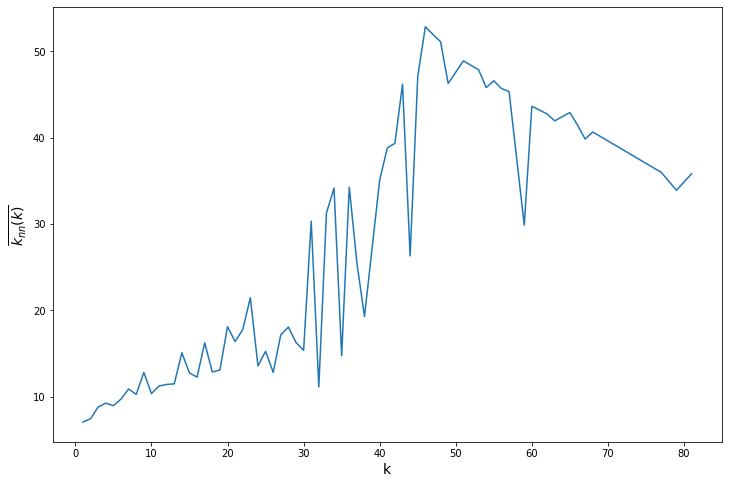

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(list(knn.keys()), list(knn.values()))
plt.xlabel('k', fontsize=14)
plt.ylabel(r'$\overline{k_{nn}(k)}$', fontsize=14);


* (1 балл) Постройте зависимость коэффициента Rich Club от k.


Граф содержал петли $\rightarrow$ не считался Rich Club $\rightarrow$ убрал петли из графа

In [ ]:
G.remove_edges_from(nx.selfloop_edges(G))

In [ ]:
k_rich = nx.rich_club_coefficient(G, normalized=False)

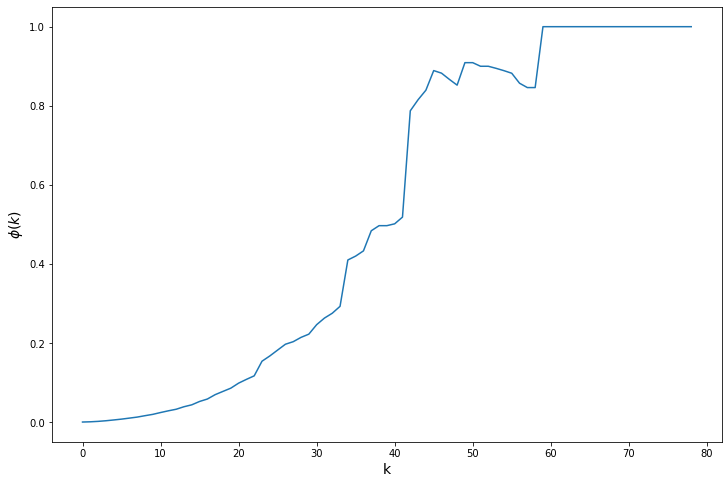

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(list(k_rich.keys()), list(k_rich.values()))
plt.xlabel('k', fontsize=14)
plt.ylabel(r'$\phi(k)$', fontsize=14);


* (2 балла) Напишите функцию разложения сети по k-core, постройте соответвующее разложение. 

Для отображения k-core использовал палитру gist_ncar
![colormap](https://matplotlib.org/stable/_images/sphx_glr_colormap_reference_007.png)

In [ ]:
def k_core(G, c, layout=nx.spiral_layout):
  fig, ax = plt.subplots(1, 2, figsize = (32,10))
  pos = layout(G)
  colors = {k:0 for k in list(G.nodes)}
  fig.suptitle(str(layout).split()[1])
  nx.draw(G, pos, node_size=20, node_color=list(colors.values()), edge_color='slategray', cmap=cm.gist_ncar, with_labels=False, width=0.2, ax=ax[0])
  ax[0].set_title("До разложения")
  k_kcore = dict()
  for core in range(1, c+1):
    kG=nx.k_core(G, k=core)
    if kG.number_of_nodes() != 0:
      for node in kG.nodes:
        colors[node]=core
        k_kcore.update({core:kG.number_of_nodes()/G.number_of_nodes()})
    else:
      break
  nx.draw(G, pos, node_size=20, node_color=list(colors.values()), edge_color='slategray', cmap=cm.gist_ncar, with_labels=False, width=0.2, ax=ax[1])
  ax[1].set_title("После")
  return k_kcore

CPU times: user 4.1 s, sys: 177 ms, total: 4.27 s
Wall time: 4.14 s


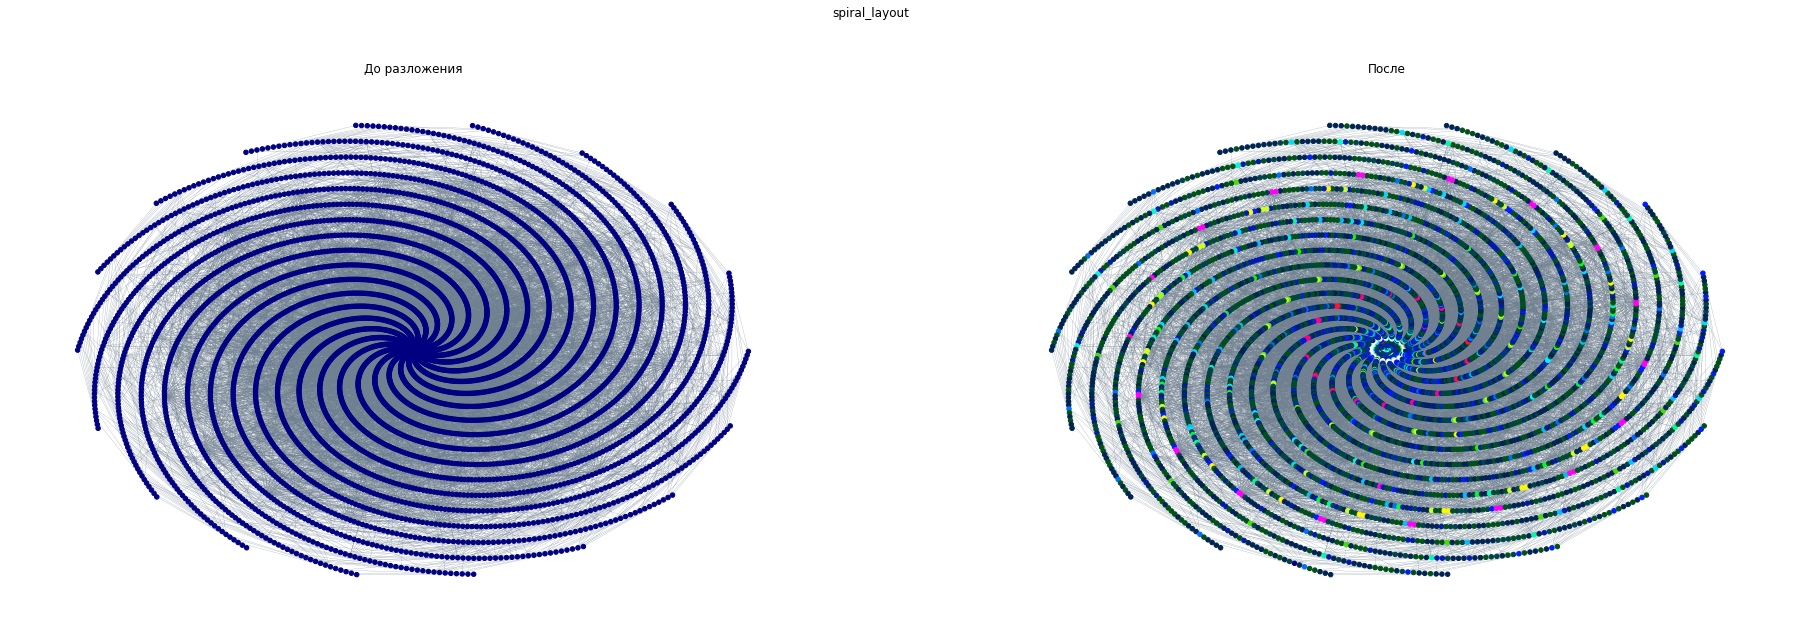

In [ ]:
%time d = k_core(G, max(degrees))

CPU times: user 3.98 s, sys: 157 ms, total: 4.13 s
Wall time: 4.01 s


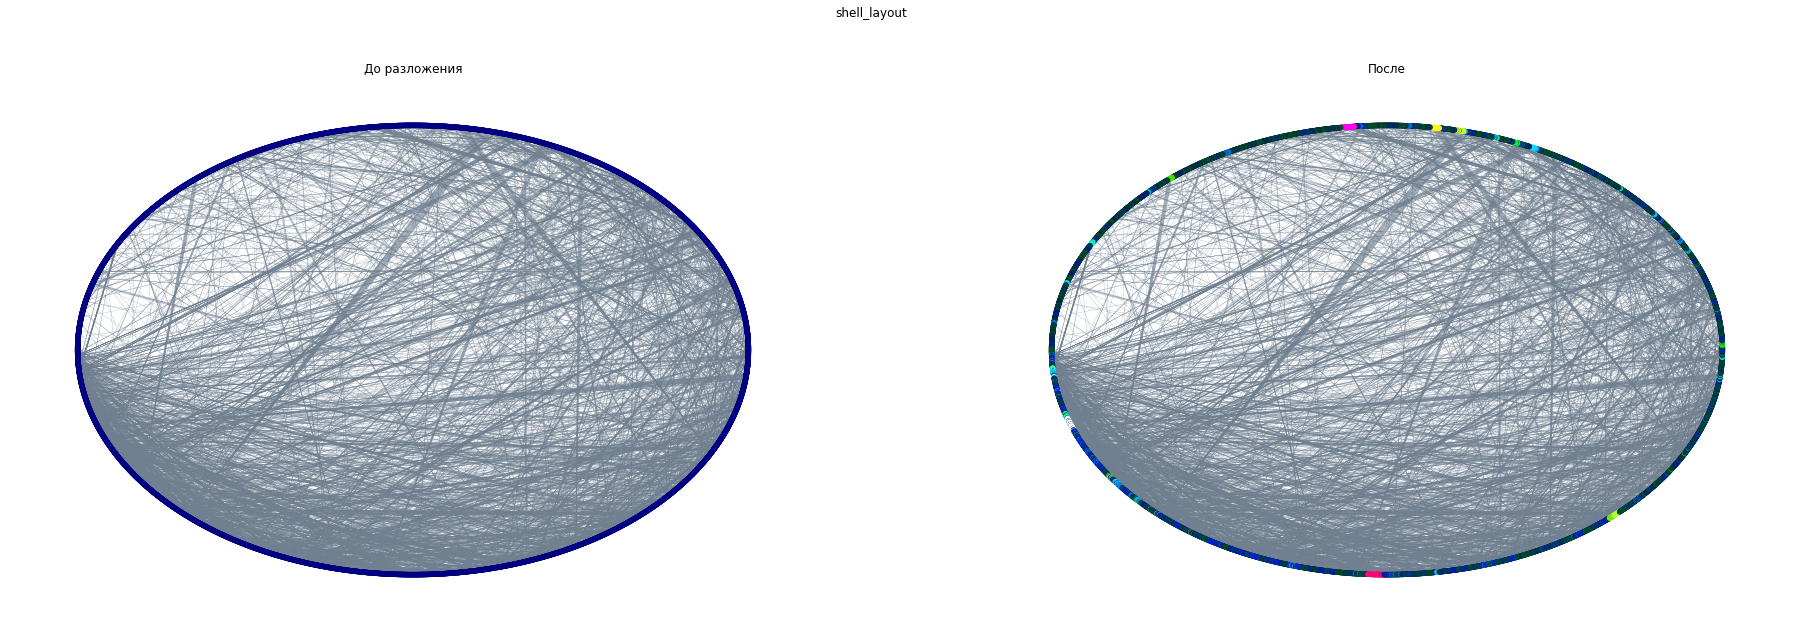

In [ ]:
%time d = k_core(G, max(degrees), nx.shell_layout)

Также построил график зависимости доли вершин, входящих в соответсвующий  k-core, от значения k.

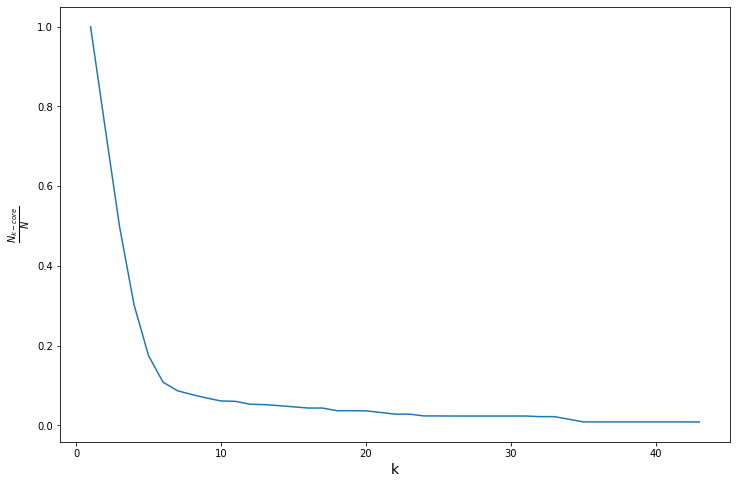

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(list(d.keys()), list(d.values()))
plt.xlabel('k', fontsize=14)
plt.ylabel(r'$\frac{N_{k-core}}{N}$', fontsize=14);

### Моделирование и рандомизация (8 баллов)

* (2 балла) Для произвольной (неслучайной) сети подберите параметры моделей Эрдеша-Реньи, Барабаши-Альберта. Постройте соответсвующие случайные сети и определите какая из моделей лучше описывает тут или иную характеристику сети. 

Вернем исходный граф (для некоторых предыдущих заданий были удалены петли)

In [ ]:
G=nx.read_edgelist('CA-GrQc.txt')

Граф несвязный, будем рассматривать диаметр через массив кратчайших путей 
(как наибольший из диаметров всех компонент (взято [отсюда](https://stackoverflow.com/questions/33114746/why-does-networkx-say-my-directed-graph-is-disconnected-when-finding-diameter)), т.к. $d_{G}=\infty$

In [ ]:
e, d, c, k = G.number_of_edges(), max([max(j.values()) for (i,j) in nx.shortest_path_length(G)]), nx.average_clustering(G), nx.degree_assortativity_coefficient(G)

In [ ]:
print("Характеристики сети:")
print(f'Количество вершин: {G.number_of_nodes()}')
print(f'Количество ребер: {e}')
print(f'Наибольший диаметр среди всех компонент: {d}') 
print(f'Кластерный коэффициент сети: {c}')
print(f'Коэффициент ассортативности: {k}')

Характеристики сети:
Количество вершин: 5242
Количество ребер: 14496
Наибольший диаметр среди всех компонент: 17
Кластерный коэффициент сети: 0.529635811052136
Коэффициент ассортативности: 0.6591640320931624


В пункте "Распределение степеней и корреляция" было получено, что распределение степеней в графе - Truncated power law. В модели Эрдёша-Реньи распределение степеней подчиняется биномиальному распределению, в Барабаши-Альберта - степенному. Скорее всего, нет особого смысла проверять модель Эрдёша-Реньи (но на всякий случай сделано).

<u>Модель Эрдёша-Реньи</u> \
Количество пар: $N_{пар}=\frac{5242\cdot5241}{2} = 13 736 661$ \
Количество ребер в исходном графе: $14484\approx0.001N_{пар}$

In [ ]:
def er_best_p():
  params = dict()
  params.update({'Исходная сеть': [e, d, c, k]})
  for p in tqdm(np.arange(0.0005, 0.002, 0.0003)):
    er = nx.erdos_renyi_graph(G.number_of_nodes(), p, seed=35)
    params.update({f'ER(p={p:.4f})':[er.number_of_edges(), max([max(j.values()) for (i,j) in nx.shortest_path_length(er)]), nx.average_clustering(er), nx.degree_assortativity_coefficient(er)]})
  #для рассчитанной вероятности
  p = 2*G.number_of_edges()/(G.number_of_nodes()*(G.number_of_nodes()-1))
  er = nx.erdos_renyi_graph(G.number_of_nodes(), p, seed=35)
  params.update({f'ER(расч. вер.)':[er.number_of_edges(), max([max(j.values()) for (i,j) in nx.shortest_path_length(er)]), nx.average_clustering(er), nx.degree_assortativity_coefficient(er)]})
  return params

In [ ]:
pd.DataFrame.from_dict(er_best_p(), orient='index', columns=['Число ребер','Диаметр*','Кластерный коэффициент','Коэффициент ассортативности']) 

  0%|          | 0/6 [00:00<?, ?it/s]

,Число ребер,Диаметр*,Кластерный коэффициент,Коэффициент ассортативности
Исходная сеть,14496,17,0.529636,0.659164
ER(p=0.0005),6979,22,0.000242,-0.019651
ER(p=0.0008),11074,13,0.000697,-0.016176
ER(p=0.0011),15253,9,0.000784,-0.002059
ER(p=0.0014),19592,8,0.000951,-0.007760
ER(p=0.0017),23699,7,0.001507,-0.004882
ER(p=0.0020),27764,6,0.001930,-0.007048
ER(расч. вер.),14626,9,0.000765,-0.003695


Как видно из таблицы, разница между характеристиками большая.

<u>Модель Барабаши-Альберта</u> \
m - количество ребер у новой вершины, для оценки возьмем окрестность среднего количества ребер, выходящих из одной вершины: $\overline{N_{e}}=\frac{N_{e}}{N_{v}}=\frac{14496}{5242}\approx2.77, т.е. 2, 3, 4$ \

In [ ]:
def ba_best_m():
  params = dict()
  params.update({'Исходная сеть': [e, d, c, k]})
  for m in tqdm([2,3,4]):
    ba = nx.barabasi_albert_graph(G.number_of_nodes(), m, seed=35)
    params.update({f'BA(m={m})':[ba.number_of_edges(), max([max(j.values()) for (i,j) in nx.shortest_path_length(ba)]), nx.average_clustering(ba), nx.degree_assortativity_coefficient(ba)]})
  return params

In [ ]:
pd.DataFrame.from_dict(ba_best_m(), orient='index', columns=['Число ребер','Диаметр*','Кластерный коэффициент','Коэффициент ассортативности']) 

  0%|          | 0/3 [00:00<?, ?it/s]

,Число ребер,Диаметр*,Кластерный коэффициент,Коэффициент ассортативности
Исходная сеть,14496,17,0.529636,0.659164
BA(m=2),10480,9,0.008037,-0.036783
BA(m=3),15717,7,0.007574,-0.049099
BA(m=4),20952,6,0.009275,-0.043459


Данная модель дает бо́льшие значения кластерного коэффициента, но разница по-прежнему большая.

Обе модели не справляются с описанием исходной сети (возможно, это связано с распределением степеней (Truncated power law))

* ( 2 балла) Постройте конфигурационную модель для выбранной сети, лучше ли эта модель справляется с описанием свойств? Определите сколько в смоделированной сети петель, мультиребер. 


In [ ]:
degrees=[d for n, d in G.degree()]
conf=nx.configuration_model(degrees,seed=35)

In [ ]:
print("Характеристики конфигурационной модели:")
print(f'Количество вершин: {conf.number_of_nodes()}')
print(f'Количество ребер: {conf.number_of_edges()}')
print(f'Наибольший диаметр среди всех компонент: {max([max(j.values()) for (i,j) in nx.shortest_path_length(conf)])}') 
#print(f'Кластерный коэффициент сети: {nx.average_clustering(conf)}') #нельзя посчитать из-за мультиребер
print(f'Кластерный коэффициент сети: {nx.average_clustering(nx.Graph(conf))}') #nx.Graph(conf) превращает мультиребра в одно ребро (не знаю надо это или нет, но оставлю)
print(f'Коэффициент ассортативности: {nx.degree_assortativity_coefficient(conf)}')

Характеристики конфигурационной модели:
Количество вершин: 5242
Количество ребер: 14496
Наибольший диаметр среди всех компонент: 11
Кластерный коэффициент сети: 0.007537876202241757
Коэффициент ассортативности: 0.004260982626267706


Конфигурационная модель не справляется с описанием характеристик исходной сети (по всем параметрам).

In [ ]:
print(f'Количество петель в исходной сети: {nx.number_of_selfloops(G)}')
print(f'Количество петель в конфигурационной модели: {nx.number_of_selfloops(conf)}')

Количество петель в исходной сети: 12
Количество петель в конфигурационной модели: 6


In [ ]:
print(f'Количество мультирёбер в конфигурационной модели: {len(G.edges()) - len(nx.Graph(conf).edges())}')

Количество мультирёбер в конфигурационной модели: 61


* (2 балла) Напишите функцию, осуществляющую заданное число шагов $Q$ рандомизации. 
Лучше задавать множителем $f$ от числа ребер в системе, т.е. $f=\frac{Q}{L}$. 


![picture](https://drive.google.com/uc?export=view&id=1KU_yRMZprZkGrcOxq_3tS3H40K9OkTxD) 

In [ ]:
def randomize_graph(G, f):
  np.random.seed(35)
  L = G.number_of_edges()
  Q = int(L*f)
  H = G.copy()
  while (Q != 0):
    hedges = list(H.edges)
    edges = [hedges[k] for k in np.random.choice(L, size=2, replace=False)]
    #все возможные ребра между вершинами (кроме взятых и петель)
    res = [(a, b) for a in edges[0] for b in edges[1] if a!=b and (a,b)]
    res = res + [(a, b) for a in edges[1] for b in edges[0] if a!=b and (a,b)]
    #проверка, что все вершины разные и две пары вершин отделены от друг друга
    if all(a not in hedges for a in res):
      H.remove_edge(*edges[0])
      H.remove_edge(*edges[1])
      H.add_edge(edges[0][0], edges[1][1])
      H.add_edge(edges[1][0], edges[0][1])
      Q -= 1
  return H

* (2 балла) Для произвольной (неслучайной) сети постройте зависимость сетевых характеристик от числа рандомизиции $f$.  

In [ ]:
param_list0 = [['Наибольший диаметр среди всех компонент'], ['Кластерный коэффициент сети'], ['Коэффициент ассортативности']]
f=np.arange(0.1, 1, 0.1)
for x in tqdm(f):
  H = randomize_graph(G, x)
  param_list0[0].append(max([max(j.values()) for (i,j) in nx.shortest_path_length(H)]))
  param_list0[1].append(nx.average_clustering(H))
  param_list0[2].append(nx.degree_assortativity_coefficient(H))

  0%|          | 0/9 [00:00<?, ?it/s]

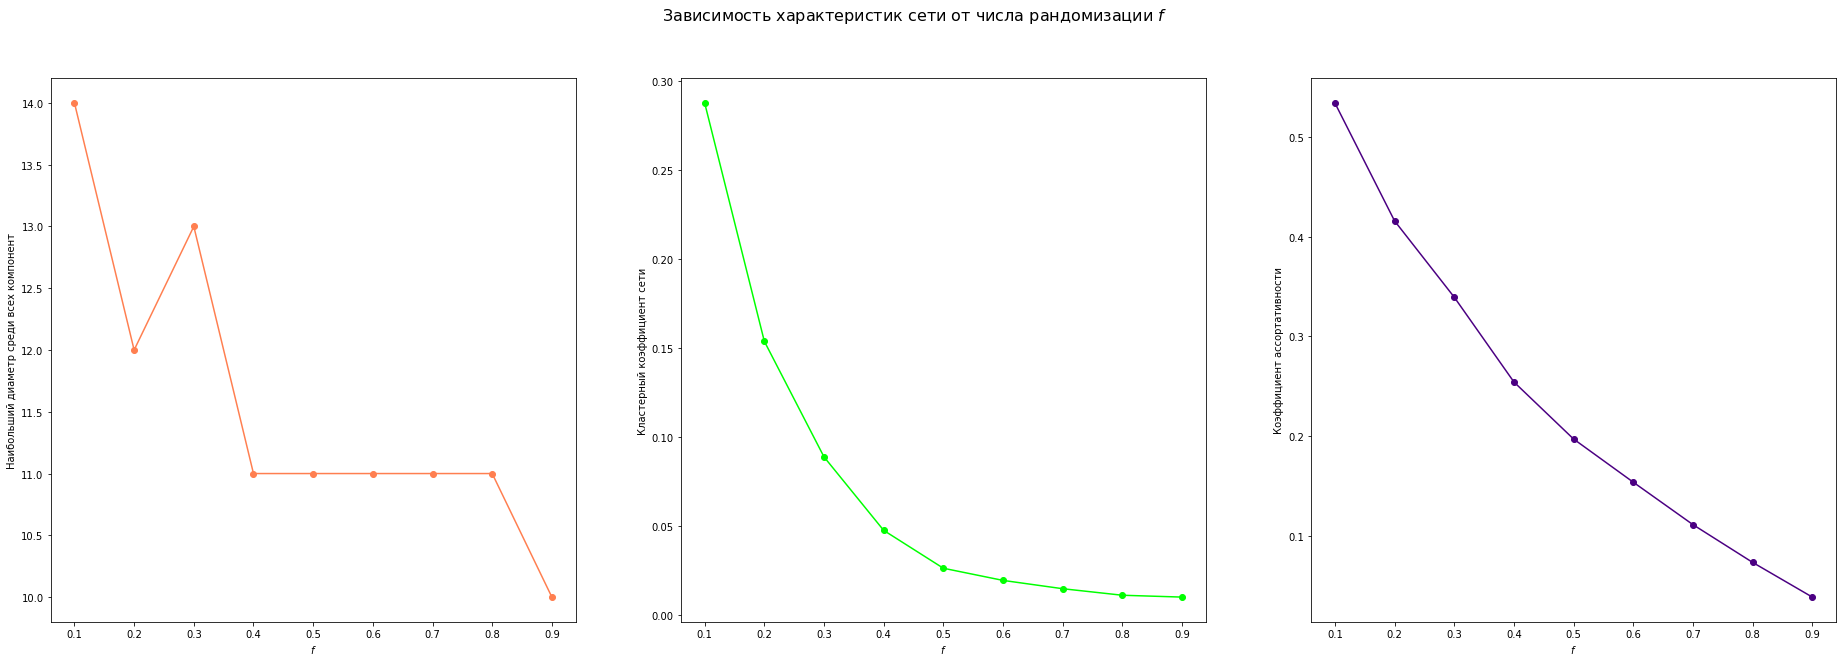

In [ ]:
clrs0 = np.array(["coral", "lime", "indigo"])
fig, ax = plt.subplots(1, 3, figsize=(32, 10), sharex=True)
fig.suptitle('Зависимость характеристик сети от числа рандомизации $f$', fontsize=16)
for i in range(3):
  ax[i].plot(f, param_list0[i][1:], 'o-', color=clrs0[i])
  ax[i].set_xlabel("$f$")
  ax[i].set_ylabel(param_list0[i][0])

В семинаре было указано, что для "полной" рандомизации $Q\approx10L\Rightarrow f\approx10$. \

In [ ]:
param_list = [['Наибольший диаметр среди всех компонент'], ['Кластерный коэффициент сети'], ['Коэффициент ассортативности']]
f=np.arange(1, 11, 1)
for x in tqdm(f):
  H = randomize_graph(G, x)
  param_list[0].append(max([max(j.values()) for (i,j) in nx.shortest_path_length(H)]))
  param_list[1].append(nx.average_clustering(H))
  param_list[2].append(nx.degree_assortativity_coefficient(H))

  0%|          | 0/10 [00:00<?, ?it/s]

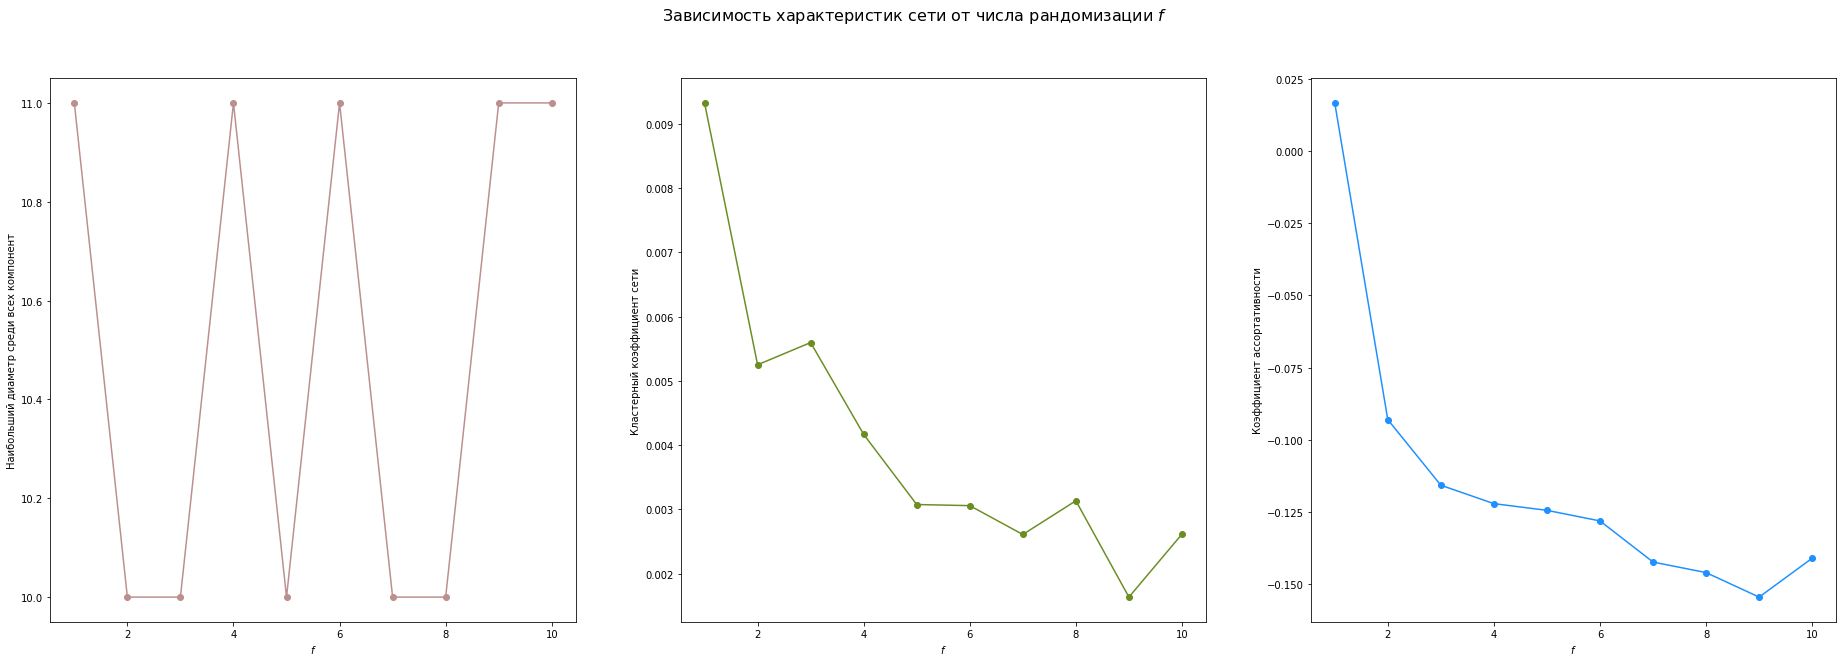

In [ ]:
clrs = np.array(["rosybrown", "olivedrab", "dodgerblue"])
fig, ax = plt.subplots(1, 3, figsize=(32, 10), sharex=True)
fig.suptitle('Зависимость характеристик сети от числа рандомизации $f$', fontsize=16)
for i in range(3):
  ax[i].plot(f, param_list[i][1:], 'o-', color=clrs[i])
  ax[i].set_xlabel("$f$")
  ax[i].set_ylabel(param_list[i][0])